In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
 !pip install scikit-learn

  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl.metadata (58 kB)
Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl (9.3 MB)
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   -------------------- ------------------- 153.6/301.8 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 301.8/301.8 kB 3.7 MB/s eta 0:00:00
Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl (42.2 MB)



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Load the Boston Dataset

In [35]:
from sklearn.datasets import fetch_openml
df = pd.read_csv('HousingData.csv')

In [36]:
df['Price'] = target

In [37]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
Price       0
dtype: int64

In [31]:
#Preparing the dataset

In [38]:
df.shape

(506, 15)

In [39]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2,36.2


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
 14  Price    506 non-null    float64
dtypes: float64(13), int64(2)
memory usage: 59.4 KB


In [41]:
# Missing Values
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
Price       0
dtype: int64

In [42]:
# summarizing the stats of the data.
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Price
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,50.000000


In [53]:
# Filling the missing valuess
#df['CRIM'] = df['CRIM'].fillna(df['CRIM'].mean())
df['ZN'] = df['ZN'].fillna(df['ZN'].mean())
df['INDUS'] = df['INDUS'].fillna(df['INDUS'].mean())
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())
df['LSTAT'] = df['LSTAT'].fillna(df['LSTAT'].mean())

In [55]:
df['CHAS'] = df['CHAS'].fillna(df['CHAS'].mean())

In [56]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
Price      0
dtype: int64

# * EDA
# * Correlation

In [58]:
df.corr()['Price']

CRIM      -0.379695
ZN         0.365943
INDUS     -0.478657
CHAS       0.179882
NOX       -0.427321
RM         0.695360
AGE       -0.380223
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.721975
MEDV       1.000000
Price      1.000000
Name: Price, dtype: float64

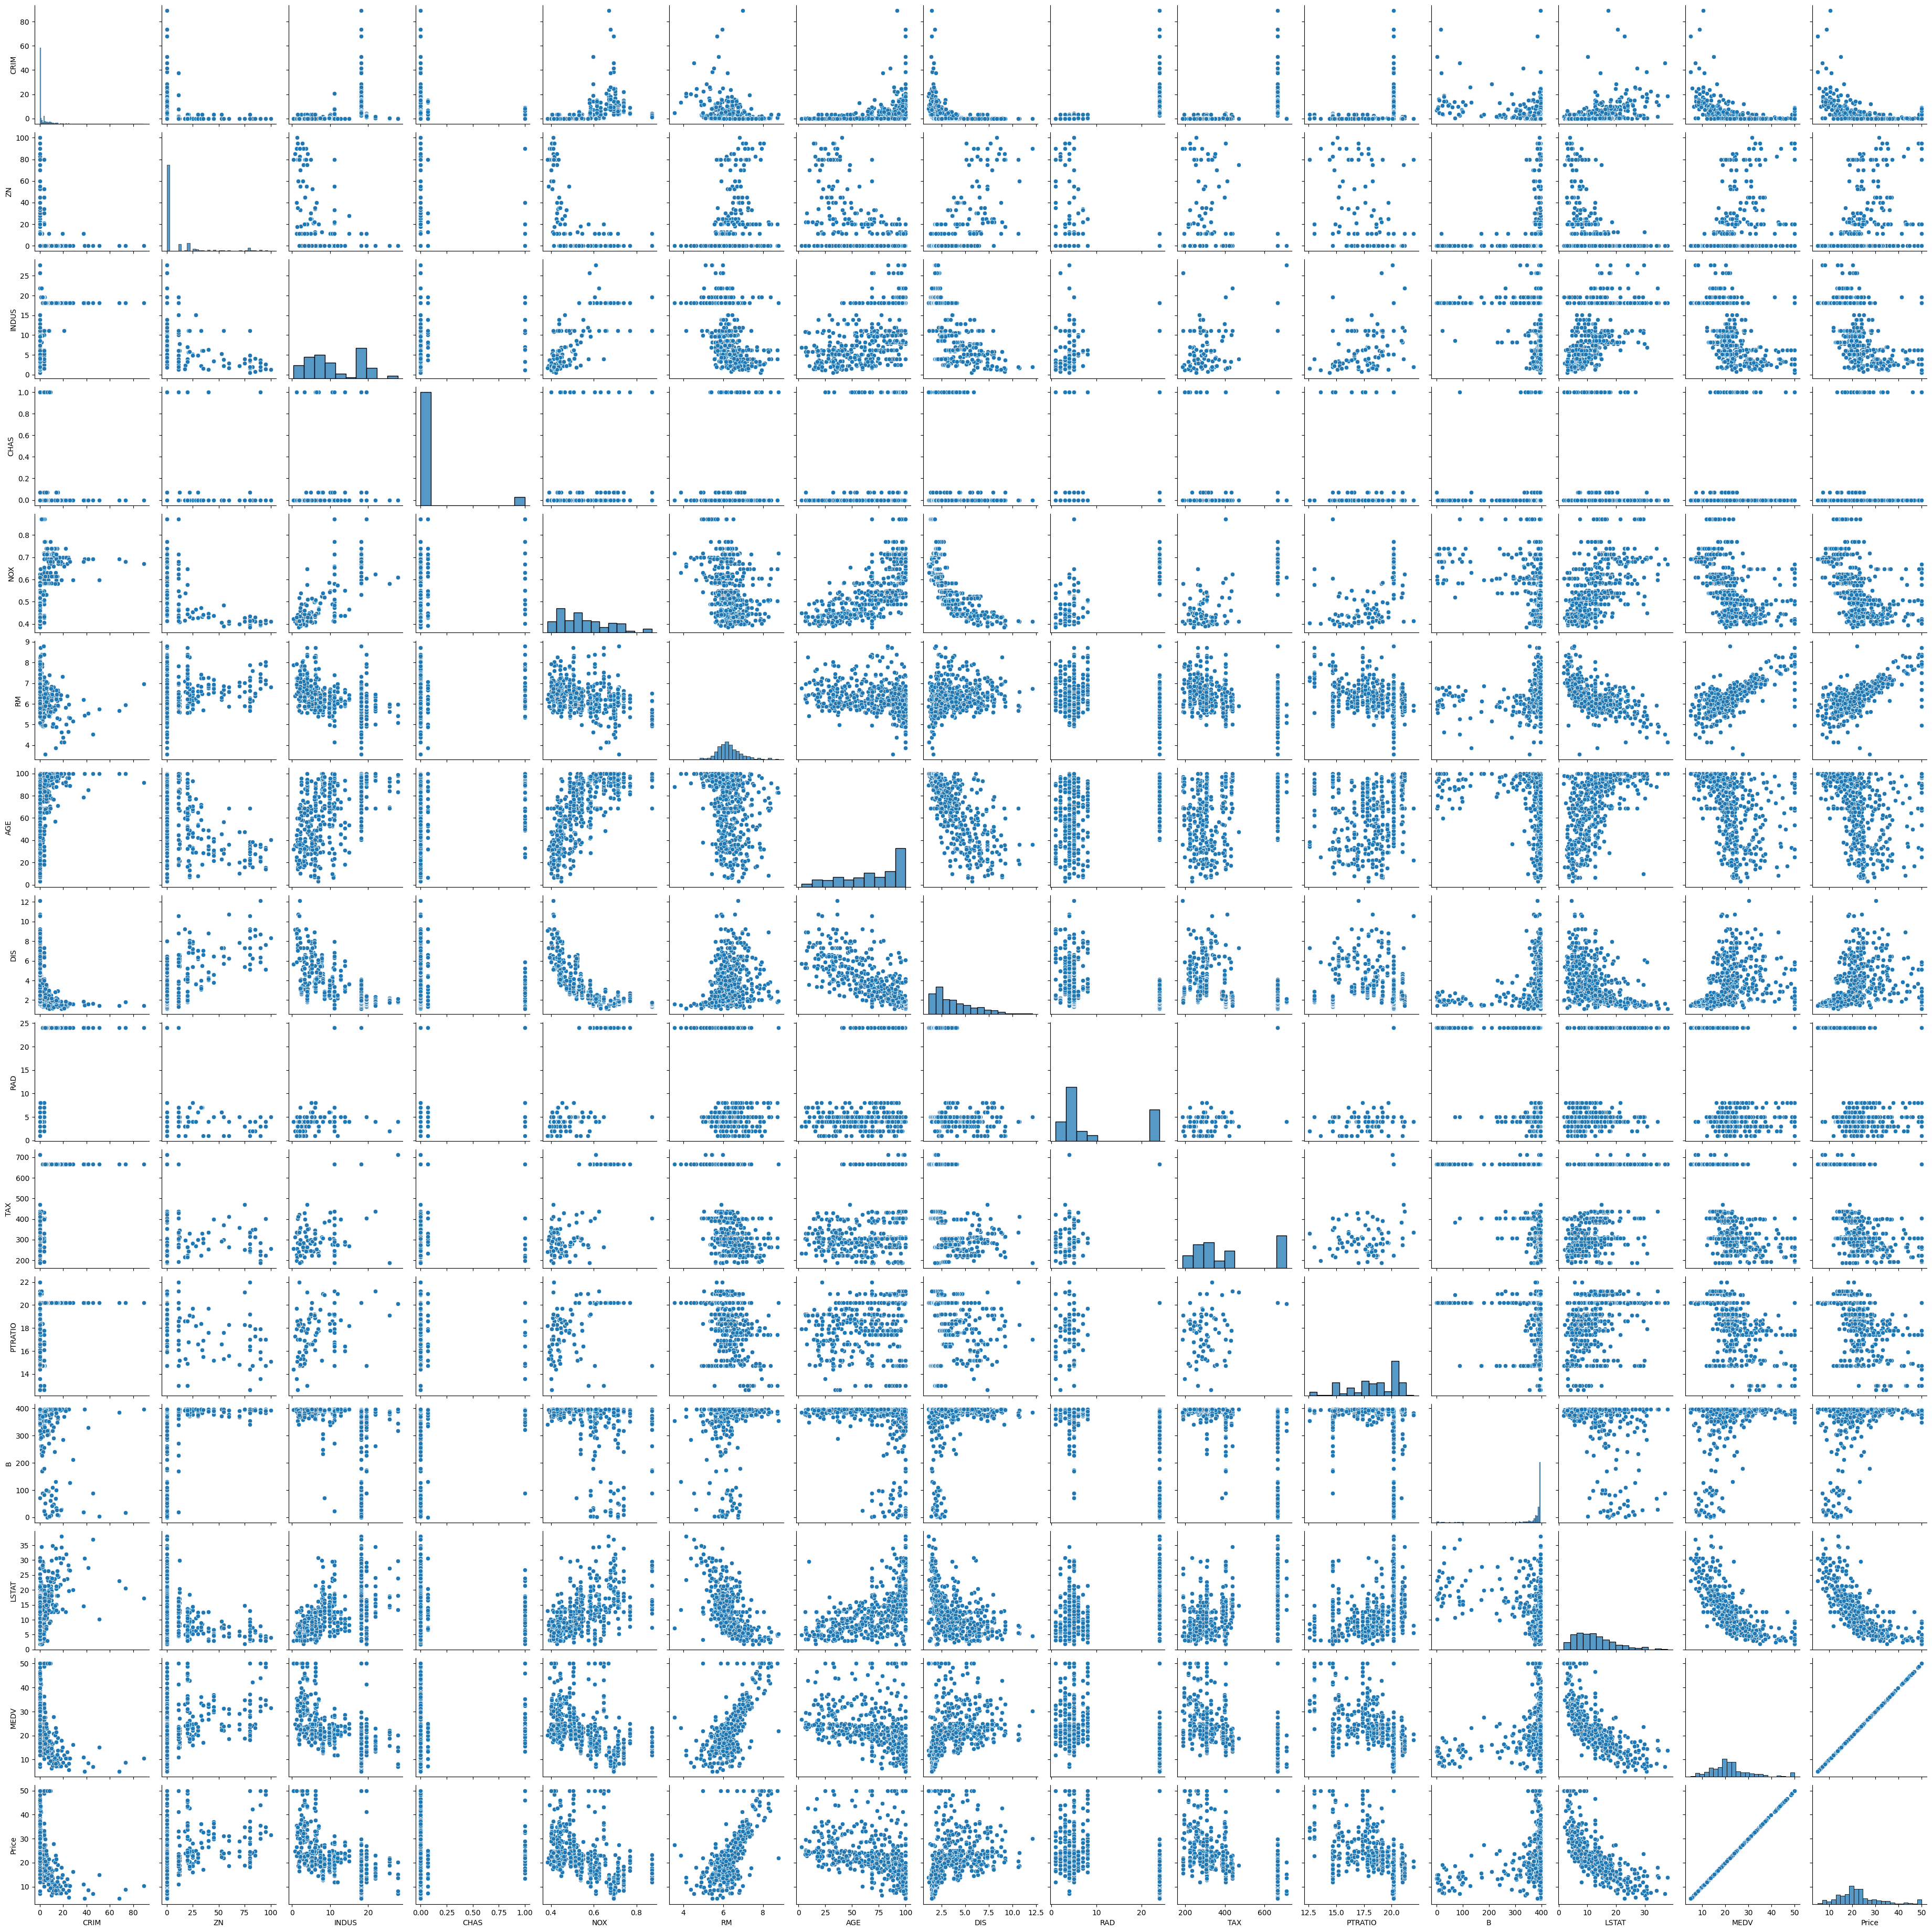

In [61]:
import seaborn as sns
sns.pairplot(df)

### Analyzing the correlated features

Text(0, 0.5, 'Price')

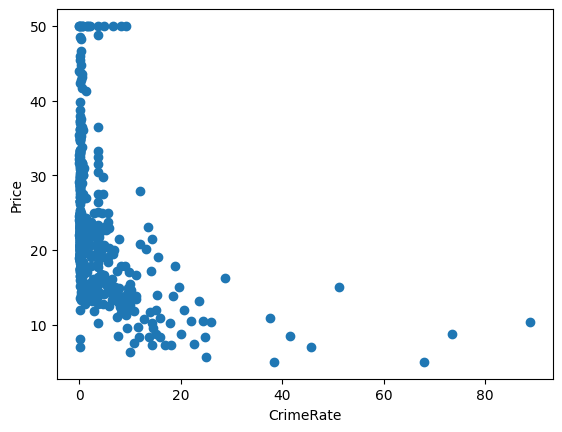

In [64]:
plt.scatter(df['CRIM'], df['Price'])
plt.xlabel('CrimeRate')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

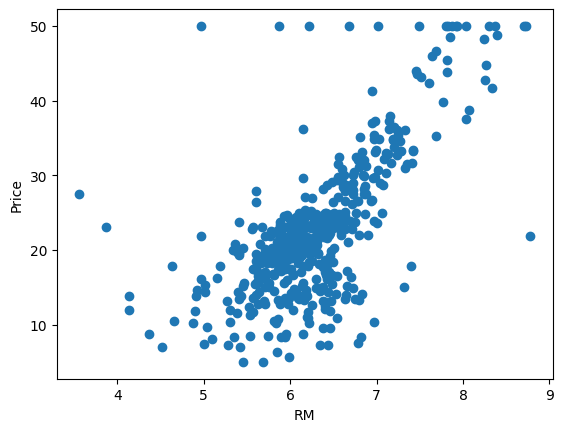

In [66]:
plt.scatter(df['RM'], df['Price'])
plt.xlabel('RM')
plt.ylabel('Price')

<Axes: xlabel='RM', ylabel='Price'>

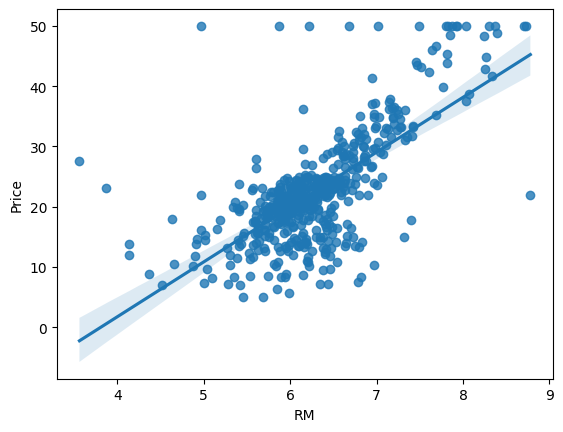

In [73]:
import seaborn as sns
sns.regplot(x='RM', y='Price', data=df)

<Axes: xlabel='LSTAT', ylabel='Price'>

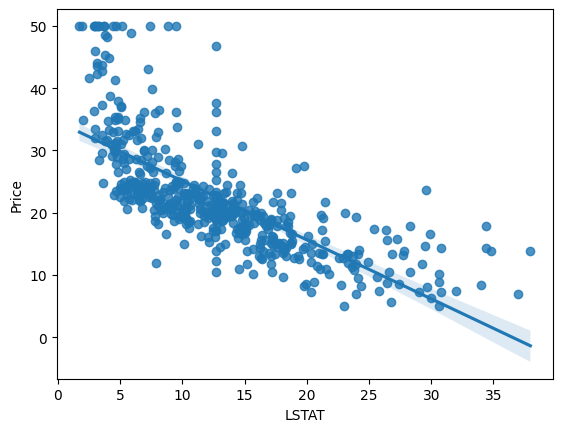

In [74]:
import seaborn as sns
sns.regplot(x='LSTAT', y='Price', data=df)

<Axes: xlabel='CHAS', ylabel='Price'>

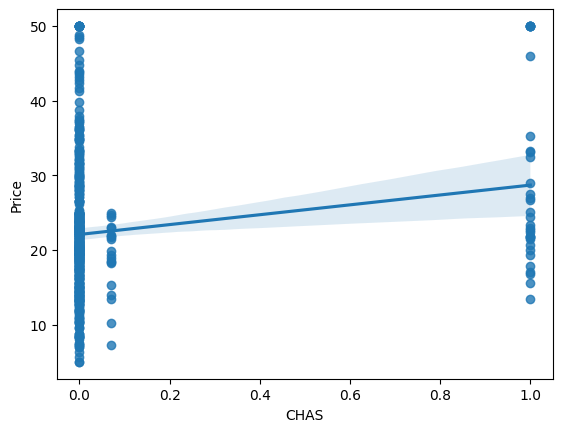

In [75]:
import seaborn as sns
sns.regplot(x='CHAS', y='Price', data=df)

<Axes: xlabel='PTRATIO', ylabel='Price'>

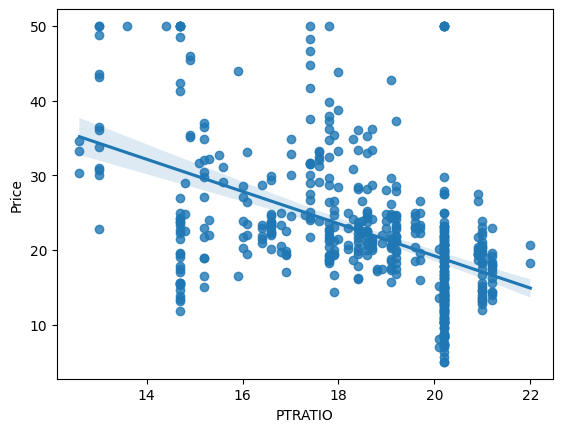

In [77]:
import seaborn as sns
sns.regplot(x='PTRATIO', y='Price', data=df)

In [78]:
# dividing features in i/p and o/p features

In [79]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0,22.0


In [88]:
X=df.iloc[:,:-2]
y=df.iloc[:,-1]

In [91]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [94]:
# TrainTest split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [96]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.210000
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.715432
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.210000
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.580000
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.660000
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.000000
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.990000
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.270000


In [97]:
# Standardizing the df
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [98]:
scaler

StandardScaler()

In [99]:
X_train= scaler.fit_transform(X_train)

In [100]:
X_test = scaler.transform(X_test)

In [102]:
X_train

array([[-0.42002854, -0.51161896, -1.31729854, ...,  0.18727079,
         0.39651419, -1.04595325],
       [-0.4076886 , -0.51161896, -0.15405495, ..., -0.21208981,
         0.3870674 ,  0.03449941],
       [-0.40285597, -0.51161896, -0.61459839, ..., -0.16771641,
         0.42854113, -0.3261728 ],
       ...,
       [-0.42182865,  3.06664934, -1.34255415, ..., -0.56707702,
         0.35987906, -0.9336675 ],
       [ 0.93011786, -0.51161896,  1.04781486, ...,  0.8528718 ,
        -2.87841346,  1.55389374],
       [-0.39590057, -0.51161896, -0.36947043, ...,  1.16348561,
        -3.32828832, -0.26571124]])

In [103]:
# Linear Regression

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
regression=LinearRegression()

In [106]:
regression

LinearRegression()

In [107]:
regression.fit(X_train, y_train)

LinearRegression()

In [110]:
regression.intercept_

23.01581920903955

In [111]:
regression.coef_

array([-1.06184703,  0.71347682, -0.07272768,  0.94344207, -1.62856223,
        3.17333232, -0.70109167, -3.04177516,  1.69879013, -1.20047368,
       -1.99733627,  1.02127847, -3.28653232])

In [113]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [115]:
# Prediction with test data

In [116]:
y_pred = regression.predict(X_test)

In [117]:
y_pred

array([28.94684244, 37.080947  , 15.16334344, 25.59977001, 18.52050399,
       22.92953198, 17.99840423, 14.43800382, 22.06639946, 20.81944231,
       25.11881906, 18.72123522, -6.3071011 , 21.86734043, 19.02489041,
       25.40599155, 19.37239698,  5.95086419, 40.85794132, 17.18432226,
       24.93251127, 30.36869589, 11.39935905, 22.76748541, 17.50857422,
       15.11943012, 21.39728476, 14.47830797, 23.13536511, 19.56542429,
       22.18119889, 25.26140438, 25.38274556, 17.33845553, 16.24266113,
       17.25502918, 30.91188566, 20.39390975, 24.67921133, 22.85756708,
       14.52166278, 31.79401526, 42.81650058, 17.99338659, 27.3605525 ,
       16.56320925, 13.95314318, 26.53462251, 19.75194991, 30.2586963 ,
       21.02578   , 33.48015966, 15.97922002, 26.27389748, 39.58817583,
       22.50675409, 18.73574376, 33.02789505, 25.25340181, 13.16505164,
       22.85496664, 31.01835795, 31.53871931, 16.756762  , 21.22003054,
       17.10830699, 19.99132099, 26.38841982, 31.29685552, 11.72

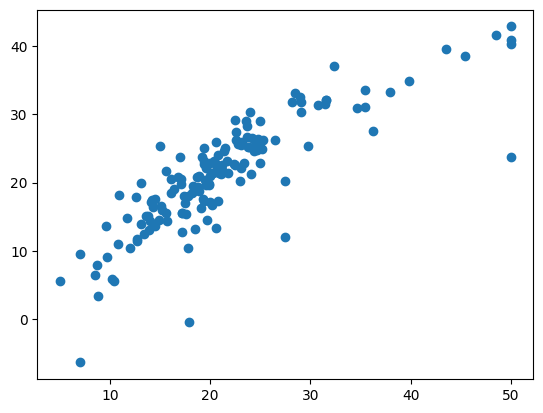

In [120]:
plt.scatter(y_test, y_pred)

In [121]:
# pred with residuals
residuals = y_test-y_pred

In [122]:
residuals

173   -5.346842
274   -4.680947
491   -1.563343
72    -2.799770
452   -2.420504
         ...   
441   -3.386594
23     0.905782
225    9.774023
433   -2.093079
447   -5.269098
Name: Price, Length: 152, dtype: float64

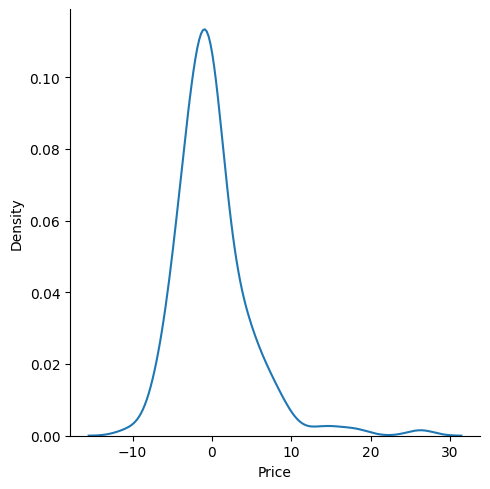

In [123]:
#plot the residuals
sns.displot(residuals, kind='kde')

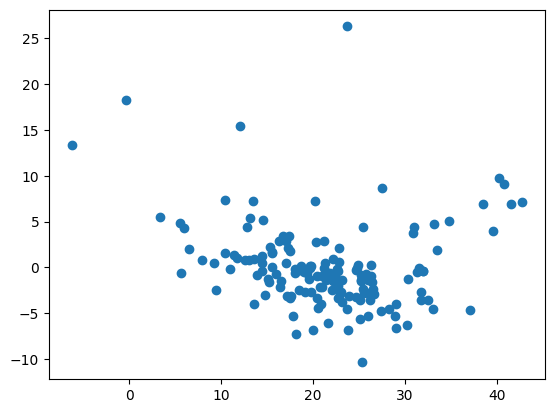

In [124]:
# scatter with respect to predictions and residuals
plt.scatter(y_pred, residuals)

In [126]:
# performance metrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [130]:
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

21.81845795352606
3.1410525671084684
4.67102322339828


In [133]:
# RSqare and Adjusted RSquare
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.7071862632031753

In [135]:
# Adjusted Rsquare
1-(1-score)*(len(y_test)-1) /(len(y_test)-X_test.shape[1]-1)

0.6796023604614455

In [136]:
# New Data Prediction
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0,22.0


In [152]:
X.iloc[1].values.reshape(1,-1)

array([[2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [153]:
scaler.transform(X.iloc[1].values.reshape(1,-1))

C:\Users\hmadarw\Learnings\DataScience\krish\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.42033665, -0.51161896, -0.59082841, -0.28851904, -0.75676687,
         0.13273241,  0.37828515,  0.5658082 , -0.862084  , -0.99251596,
        -0.21208981,  0.42854113, -0.48020582]])

In [154]:
regression.predict(scaler.transform(X.iloc[1].values.reshape(1,-1)))

C:\Users\hmadarw\Learnings\DataScience\krish\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([24.70174082])

In [155]:
import pickle

In [158]:
pickle.dump(regression, open('regmodel.pkl','wb'))

In [160]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

In [161]:
pickled_model.predict(scaler.transform(X.iloc[1].values.reshape(1,-1)))

C:\Users\hmadarw\Learnings\DataScience\krish\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([24.70174082])